# Arefeen Shamsuzzoha
# 6/1/2021
# MA 544 
# Programming Assignment 1: NumPy Basics and Matrix Manipulations

### 1. Write a function trace1D() that finds the trace of a matrix given by a one dimensional NumPy array. 
You can not use the built-in function np.trace() or any other builtin function in any way.
        
Display the output of ```print(“Trace of the suggested matrix is: {}”.format(trace1D(np.arange(0,100,1))))```

#### Solution
Need to reshape a one-dimensional array into a square matrix.
* matrix must to be a square, must check that shape of array given is a square
* take square root of number to reshape the array in nxn matrix
* loop through n rows and sum nth col of nth row to get trace

**Answer below**

In [1]:
import numpy as np
import math

In [2]:
inp = np.arange(0,64,1)
inp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [3]:
if int(math.sqrt(inp.shape[0]) + 0.5) ** 2 == inp.shape[0]:
    print("ok")
else:
    print("Can't take trace, not a square matrix")

ok


In [4]:
inp = np.arange(0,64,1)
num = int(math.sqrt(inp.shape[0]))
shp = inp.shape[0]

In [5]:
if int(num + 0.5) ** 2 == shp:
    print("Can take trace, ", num, "by", num, "matrix")
else:
    print("Can't take trace, not a square matrix")

Can take trace,  8 by 8 matrix


In [6]:
mat = inp.reshape(num,num)
mat

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [7]:
mat[0]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [8]:
mat[0][0]

0

In [9]:
mat[num-1][num-1]

63

In [10]:
sum = 0
for n in range(0,num): sum += n
print(sum)

28


In [11]:
sum = 0
for n in range(0,num): sum += mat[n][n]
print(sum)

252


In [12]:
inp = np.arange(0,64,1)
num = int(math.sqrt(inp.shape[0]))
shp = inp.shape[0]

if int(num + 0.5) ** 2 == shp:
    sum = 0
    for n in range(0,num): sum += mat[n][n]
    print(sum)
else:
    print("Can't take trace, not a square matrix")

252


#### Answer

In [13]:
import numpy as np
import math

def trace1D(number):
    inp = np.arange(0,number,1)
    num = int(math.sqrt(inp.shape[0]))
    shp = inp.shape[0]

    if int(num + 0.5) ** 2 == shp: 
        sum = 0
        for n in range(0,num): sum += mat[n][n]
        print("Trace of the suggested matrix is: {}".format(sum))
    else:
        print("Can't take trace, not a square matrix")

In [14]:
trace1D(64)

Trace of the suggested matrix is: 252


In [15]:
trace1D(65)

Can't take trace, not a square matrix


### 2. Read an appropriate RGB-image of your choice in a 3-D Tensor named myRGB. 
Perform the following operations on this tensor:
* (A) Pad the image by 5 pixels on all sides. This operation is akin to putting  a dark frame around the image. Display this image.
* (B) Use a sliding window of a 3x3 matrix, K (referred to as a kernel), to perform an operation called convolution on the original image. 
    Display some of these images after convolution. Note that you only need to use appropriate slicing of the source image, element wise product, and np.dot in loops to perform this. 
    Display the images after convolutions using *K=[1 0 -1;0 0 0;-1 0 1]* and *K = [0 -1 0; -1 4 -1; 0 -1 0]*. Indicate what these convolutions have achieved. 
    To know more about convolution and how to achieve it, read Section 9.2 in https://www.deeplearningbook.org/contents/convnets.html

#### A -- Solution
* Use example in class notebook
* Image in a image folder **./images/**
* Photo by <a href="https://unsplash.com/@tandala?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Ghenadie Cebanu</a> on <a href="https://unsplash.com/s/photos/rgb?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

* Create a black image 5px larger on all sides with respect to image using a zero RGB matrix
    * height + 10, width + 10

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

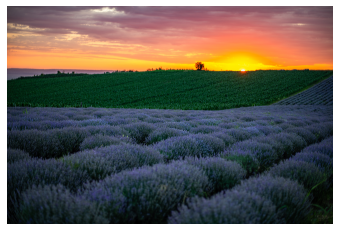

Original order of the image tensor: (4016, 6016, 3)
After vectorizing the image, the dimensions are: (24160256, 3)


In [17]:
#read image
myRGB = mpimg.imread('./images/ghenadie-cebanu-F_nDaXqRtlw-unsplash.jpg')

#display image
plt.axis('off')
plt.imshow(myRGB)
plt.show()  

#image properties
dim = myRGB.shape
height, width, channel = myRGB.shape[:]
print ("Original order of the image tensor:", dim)
X = myRGB.reshape(-1,3)/255.0
print("After vectorizing the image, the dimensions are:", X.shape )

Order of the framed image matrix: (4026, 6026, 3)


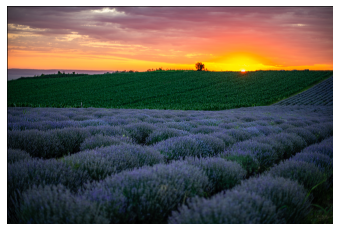

In [18]:
base_size = height + 10, width + 10, channel
myRGB_framed = np.zeros(base_size, dtype = np.uint8)
print ("Order of the framed image matrix:", myRGB_framed.shape)
myRGB_framed[10:(height+10), 10:(width+10)] = myRGB

# Show framed image
plt.axis('off')
plt.imshow(myRGB_framed)
plt.show()

#### B - Solution

* Set up convolution matrices ```K1 = [1 0 -1;0 0 0;-1 0 1], K2 = [0 -1 0; -1 4 -1; 0 -1 0]``` and display
* Display the images after convolutions

From https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/:
>In reality, an (image) convolution is simply an element-wise multiplication of two matrices followed by a sum.
>* Take two matrices (which both have the same dimensions).
>* Multiply them, element-by-element (i.e., not the dot-product, just a simple multiplication).
>* Sum the elements together.

In [19]:
import matplotlib.pyplot as plt
from scipy import signal as sg

[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]


<function matplotlib.pyplot.show(close=None, block=None)>

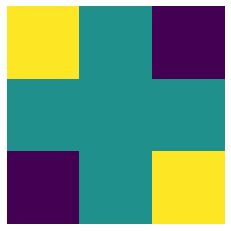

In [20]:
k1 = np.array([[ 1, 0, -1],
               [ 0, 0,  0],
               [-1, 0,  1]])
print(k1)
plt.axis('off')
plt.imshow(k1)
plt.show

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


<function matplotlib.pyplot.show(close=None, block=None)>

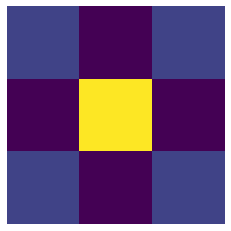

In [21]:
k2 = np.array([[ 0, -1,  0],
               [-1,  4, -1],
               [ 0, -1,  0]])
print(k2)
plt.axis('off')
plt.imshow(k2)
plt.show

#### Convolution for 1 bit

In [22]:
first_tensor_bit = myRGB[0][0][0]
print(first_tensor_bit)

62


In [23]:
first_kernel_bit = k1[0][0]
print(first_kernel_bit)

1


In [24]:
first_convolution_prod = myRGB[0][0][0] * k1[0][0]
print(first_convolution_prod)

62


In [25]:
first_convolution = myRGB[0][0][0]
print(first_convolution)

62


In [26]:
#all in one
conv = myRGB[0:3, 0:3, 0] + k1*(myRGB[0:3,0:3,0])
print(conv)

[[124  64   0]
 [ 65  65  64]
 [  0  65 128]]


#### Convolution for-loop

In [27]:
new_image = np.zeros([myRGB.shape[0],myRGB.shape[1]])

In [29]:
m, n = k1.shape #3,3
x,y,z = myRGB.shape #4016,6016, 3
for i in range(x):
    for j in range(y):
        new_image[i][j] += myRGB[i][j][0]*k1[i][j]

IndexError: index 3 is out of bounds for axis 0 with size 3

<function matplotlib.pyplot.show(close=None, block=None)>

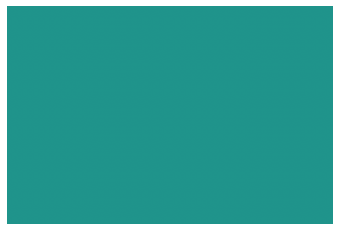

In [30]:
plt.axis('off')
plt.imshow(new_image)
plt.show

#### Unfortunately, not understanding how to get the for loop to work and how exactly to calculation the convolution

### 3. IRIS flower dataset is one of the widely used resources. Load the IRIS data by using: 
```python
from sklearn import datasets
iris = datasets.load_iris().data
```
* Normalize this data by using z-scoring ```z  = (x - x_mean)/std)```. 
* Don't use loops. 
* You can use np.mean(), np.std() and basic matrix operation with broadcasting. 
* Visualize the distribution of this data using Matplotlib or other packages.  

#### Solution

* import IRIS dataset using given code
* normalize using numpy operations and broadcasting
* Visualize using Matplotlib

In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris().data

In [32]:
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
iris_zscored = (iris - iris.mean()) / iris.std()

In [34]:
iris_zscored

array([[ 0.82858665,  0.01798522, -1.04592915, -1.65388022],
       [ 0.72726147, -0.23532773, -1.04592915, -1.65388022],
       [ 0.62593629, -0.13400255, -1.09659174, -1.65388022],
       [ 0.5752737 , -0.18466514, -0.99526657, -1.65388022],
       [ 0.77792406,  0.06864781, -1.04592915, -1.65388022],
       [ 0.98057441,  0.22063558, -0.89394139, -1.55255505],
       [ 0.5752737 , -0.03267737, -1.04592915, -1.60321764],
       [ 0.77792406, -0.03267737, -0.99526657, -1.65388022],
       [ 0.47394852, -0.28599032, -1.04592915, -1.65388022],
       [ 0.72726147, -0.18466514, -0.99526657, -1.70454281],
       [ 0.98057441,  0.1193104 , -0.99526657, -1.65388022],
       [ 0.67659888, -0.03267737, -0.94460398, -1.65388022],
       [ 0.67659888, -0.23532773, -1.04592915, -1.70454281],
       [ 0.42328593, -0.23532773, -1.19791692, -1.70454281],
       [ 1.18322477,  0.27129817, -1.14725433, -1.65388022],
       [ 1.13256218,  0.47394852, -0.99526657, -1.55255505],
       [ 0.98057441,  0.

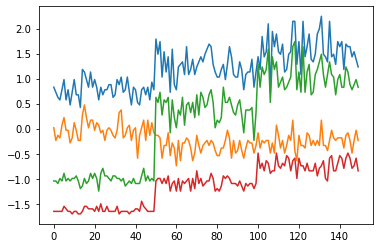

In [35]:
plt.plot(iris_zscored)
plt.show()